# Homework 4

## Mysql-Python Connection

In [1]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline

In [2]:
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="Bk454454.", 
    auth_plugin='mysql_native_password'
)
print(db_connection)



In [3]:
# creating database_cursor to perform SQL operation to run queries
db_cursor = db_connection.cursor(buffered=True)

# executing cursor with execute method and pass SQL query
db_cursor.execute("CREATE DATABASE ps_ecommerce")

# get list of all databases
db_cursor.execute("SHOW DATABASES")

# print all databases
for db in db_cursor:
    print(db)
    
db_cursor.execute("USE ps_ecommerce")

('information_schema',)
('mysql',)
('performance_schema',)
('ps_ecommerce',)
('sys',)
('testdb',)
('world',)


## Load Data to Mysql Tables

In [ ]:
def populate_table(db_connection, db_cursor, insert_query, file_path):
    
    with open(file_path, mode='r') as csv_data:
        reader = csv.reader(csv_data, delimiter=';')
        csv_data_list = list(reader)
        for row in csv_data_list[1:]:
            row = tuple(map(lambda x: None if x == "" else x, row[0].split(',')))
            db_cursor.execute(insert_query, row)
        
    db_connection.commit()

In [ ]:
# create CUSTOMERS table
db_cursor.execute("""CREATE TABLE CUSTOMERS (customer_id VARCHAR(50) NOT NULL, 
                                          customer_unique_id VARCHAR(50) NOT NULL, 
                                          customer_zip_code_prefix VARCHAR(50), 
                                          customer_city VARCHAR(50), 
                                          customer_state VARCHAR(50))""")

insert_customers = (
    "INSERT INTO CUSTOMERS(customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state) "
    "VALUES (%s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_customers, "customers.csv")

In [ ]:
# create ORDER_PAYMENTS table
db_cursor.execute("""CREATE TABLE ORDER_PAYMENTS (order_id VARCHAR(50) NOT NULL, 
                                          payment_sequential INTEGER, 
                                          payment_type VARCHAR(50), 
                                          payment_installments INTEGER, 
                                          payment_value FLOAT)""")

insert_orderpayments = (
    "INSERT INTO ORDER_PAYMENTS(order_id, payment_sequential, payment_type, payment_installments, payment_value) "
    "VALUES (%s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_orderpayments, "order_payments.csv")

In [ ]:
# create ORDER_ITEMS table
db_cursor.execute("""CREATE TABLE ORDER_ITEMS (order_id VARCHAR(50) NOT NULL, 
                                          order_item_id INTEGER, 
                                          product_id VARCHAR(50), 
                                          seller_id VARCHAR(50), 
                                          shipping_limit_date DATETIME,
                                          price FLOAT,
                                          freight_value FLOAT)""")

insert_orderitems = (
    "INSERT INTO ORDER_ITEMS(order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value) "
    "VALUES (%s, %s, %s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_orderitems, "order_items.csv")

In [ ]:
# create ORDERS table
db_cursor.execute("""CREATE TABLE ORDERS (order_id VARCHAR(50) NOT NULL, 
                                          customer_id VARCHAR(50) NOT NULL, 
                                          order_status VARCHAR(50), 
                                          order_purchase_timestamp DATETIME, 
                                          order_approved_at DATETIME,
                                          order_delivered_carrier_date DATETIME,
                                          order_delivered_customer_date DATETIME,
                                          order_estimated_delivery_date DATETIME)""")

insert_orders = (
    "INSERT INTO ORDERS(order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) "
    "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_orders, "orders.csv")

## Question 1 (10 pts)

In [ ]:
# Find the average number of weeks between products' actual delivery dates and estimated delivery dates. 
# Use order_delivered_customer_date column as actual delivery dates and 
# order_estimated_delivery_date column as estimated delivery dates.

# HINT: There is a function in MySQL that makes it easy to compute the difference between two timestamps.
# We recommend that you search for it online and use it in your answer.



In [4]:
# Solve Question 1 below


#############################Q1 SOLUTION ######################################
# Explanation about my solution to Q1:
#For finding the difference between the two timestamps, I have used the function called 
# TIMESTAMPDIFF. As the unit parameter, I have passed "WEEK" in order to specify the 
# difference between the order_estimated_delivery_date and order_delivered_customer_date. 
# For taking the average number of week differences between the actual delivery dates 
# and estimated delivery dates, I have used the aggregate function which is called as "AVG()". 

#defining what the first query is 
first_query = "SELECT AVG(TIMESTAMPDIFF(WEEK,order_delivered_customer_date,order_estimated_delivery_date)) FROM ORDERS"

#executing the first_query by calling execute method with the db_cursor object
db_cursor.execute(first_query)

num_weeks = db_cursor.fetchall() # calling fetchall() function for the second query

print(num_weeks) #printing the result of the second query 




[(Decimal('1.1862'),)]


## Question 2 (15 pts)

In [ ]:
# Consider the ORDER_COSTS table below. Using this table and the CUSTOMERS table, find the following:
# In which states do customers spend, on average, more than 164 on their orders? 
# Fetch those states and average order costs in those states. Results should be ordered from lowest cost to highest.

In [ ]:
order_costs_query = """
                    CREATE TABLE ORDER_COSTS AS (
                        SELECT ORDERS.order_id, SUM(price) AS cost, ORDERS.customer_id as cid
                        FROM ORDER_ITEMS 
                             JOIN ORDERS
                             ON ORDER_ITEMS.order_id=ORDERS.order_id
                        GROUP BY order_id, ORDERS.customer_id)
                    """

db_cursor.execute(order_costs_query)

In [5]:


#############################Q2 SOLUTION ######################################



db_cursor.execute("""SELECT CUSTOMERS.customer_state,AVG(ORDER_COSTS.cost)
                      FROM CUSTOMERS
                      JOIN
                      ORDER_COSTS
                      ON ORDER_COSTS.cid=CUSTOMERS.customer_id
                      GROUP BY CUSTOMERS.customer_state
                      HAVING AVG(ORDER_COSTS.cost)>164
                      ORDER BY ORDER_COSTS.cost ASC""")
                    

states_of_order_costs = db_cursor.fetchall()

print(states_of_order_costs)

cust_state,average_order_costs = map (list , zip(*states_of_order_costs))

print(cust_state)
print()
print(average_order_costs)
print()
print(cust_state, average_order_costs)


[('PE', 165.95715586927687), ('MT', 184.82068734097837), ('RN', 168.72618171229507), ('PA', 182.85564198849806), ('TO', 179.9429249493581), ('AL', 202.31006200565315), ('RR', 279.38705960442036), ('RO', 217.85388387291178), ('PB', 222.1680950891404), ('MS', 173.50979253761005), ('AC', 224.56719970703125)]
['PE', 'MT', 'RN', 'PA', 'TO', 'AL', 'RR', 'RO', 'PB', 'MS', 'AC']

[165.95715586927687, 184.82068734097837, 168.72618171229507, 182.85564198849806, 179.9429249493581, 202.31006200565315, 279.38705960442036, 217.85388387291178, 222.1680950891404, 173.50979253761005, 224.56719970703125]

['PE', 'MT', 'RN', 'PA', 'TO', 'AL', 'RR', 'RO', 'PB', 'MS', 'AC'] [165.95715586927687, 184.82068734097837, 168.72618171229507, 182.85564198849806, 179.9429249493581, 202.31006200565315, 279.38705960442036, 217.85388387291178, 222.1680950891404, 173.50979253761005, 224.56719970703125]


## Question 3 (15 pts)

In [ ]:
# Implement the following function get_month. It takes as input a month as an integer.
# It needs to compute: In the given month, how many payments were made with each different payment type?
# e.g.: Credit card -> 5000 payments, debit card -> 100 payments, voucher -> 300 payments, ...

# HINT: One of the MySQL functions we covered in the PS makes it easy to work with months.

In [6]:
# Solve Question 3 below

def get_month(month):
    #############################Q3 SOLUTION ######################################
    query = "SELECT ORDER_PAYMENTS.payment_type,COUNT(ORDER_PAYMENTS.payment_type) FROM ORDER_PAYMENTS JOIN ORDERS ON ORDERS.order_id=ORDER_PAYMENTS.order_id WHERE MONTH(ORDERS.order_purchase_timestamp) = "+month+" GROUP BY ORDER_PAYMENTS.payment_type"
    db_cursor.execute(query)
    items = db_cursor.fetchall()
    return items

In [7]:
# Here is a sample function call for get_month:
print(get_month("2"))

[('credit_card', 6609), ('boleto', 1723), ('voucher', 424), ('debit_card', 82)]


## Question 4 (10 pts)

In [ ]:
# Consider the PRODUCTS table below and the ORDER_ITEMS table from earlier. 
# For each product category other than {"moveis_decoracao", "beleza_saude"}, find the minimum price that was paid for
# an item from that category. Limit the result to retrieve only 6 rows.

# The result should be like: category1 -> minprice1, category2 -> minprice2, ...

In [ ]:
db_cursor.execute("""CREATE TABLE PRODUCTS (product_id VARCHAR(50) NOT NULL, 
                                            product_category_name VARCHAR(50), 
                                            product_name_lenght INTEGER, 
                                            product_description_lenght INTEGER, 
                                            product_photos_qty INTEGER,
                                            product_weight_g INTEGER,
                                            product_length_cm INTEGER,
                                            product_height_cm INTEGER,
                                            product_width_cm INTEGER)""")

insert_products = (
    "INSERT INTO PRODUCTS(product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm,  product_height_cm, product_width_cm) "
    "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_products, "products.csv")

In [8]:
#My solution for the question-4 

#############################Q4 SOLUTION ######################################

# Solve Question 4 below
fourth_query = """SELECT PRODUCTS.product_category_name AS category, MIN(ORDER_ITEMS.price) AS min_price
             FROM ORDER_ITEMS
             JOIN PRODUCTS
             ON ORDER_ITEMS.product_id=PRODUCTS.product_id
             WHERE product_category_name NOT IN (SELECT product_category_name FROM PRODUCTS WHERE product_category_name = "moveis_decoracao")
             AND product_category_name NOT IN (SELECT product_category_name FROM PRODUCTS WHERE product_category_name = "beleza_saude"
             )
             GROUP BY PRODUCTS.product_category_name
             LIMIT 6"""

db_cursor.execute(fourth_query)

fourth_res = db_cursor.fetchall()

print(fourth_res)


category_nm, min_pr = map(list , zip(*fourth_res))














[('esporte_lazer', 5.49), ('utilidades_domesticas', 4.4), ('cama_mesa_banho', 6.99), ('informatica_acessorios', 3.9), ('relogios_presentes', 8.99), ('brinquedos', 4.99)]


## Question 5 (10 pts)

In [ ]:
# Draw a pie chart using the data from the previous question.
# Labels of your pie chart should be the product categories.
# Contents of your pie chart (i.e., sizes of the pie slices) should be determined by the min prices.

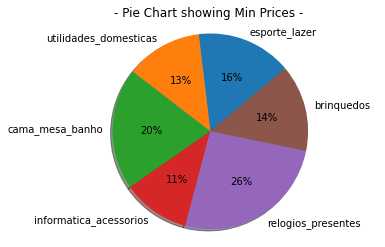

In [9]:
# Solve Question 5 below

#############################Q5 SOLUTION ######################################


#Plotting the pie chart 
explode = (0, 0, 0, 0, 0, 0)
fig1,ax1 = plt.subplots()
ax1.pie(min_pr,explode=explode,labels=category_nm,autopct="%1.0f%%",shadow=True, startangle=40)
ax1.axis('equal')
plt.title("- Pie Chart showing Min Prices - ") #giving title to pie chart
plt.show() #for displaying the pie chart


## Question 6 (15 pts)

In [ ]:
# Let us define "large products" as those products with weight > 400 and length > 10.
# Some orders that contain a large product can have large discrepancies between their order_delivered_carrier_date and 
# order_delivered_customer_date. 
# Let us define "strange orders that contain large products" as those orders which contain a large product and the 
# difference between their order_delivered_carrier_date and order_delivered_customer_date is larger than 100 days.

# For all "strange orders that contain large products", find their order IDs and the number of days difference between 
# their order_delivered_carrier_date and order_delivered_customer_date.
# Result should be like: "abc21312df" -> 132, "dhs230kdf8" -> 119, ...

# HINT: Using the same MySQL function as Question 1 may help.


#product_weight_g INTEGER,
#product_length_cm INTEGER,
                                            #product_height_cm INTEGER,
                                            #product_width_cm INTEGER)""")






In [10]:
# Solve Question 6 below


#############################Q6 SOLUTION ######################################

sixth_query = """SELECT ORDERS.order_id,TIMESTAMPDIFF(DAY,ORDERS.order_delivered_carrier_date,
              ORDERS.order_delivered_customer_date)
              FROM ORDERS
              JOIN ORDER_ITEMS
              ON ORDER_ITEMS.order_id=ORDERS.order_id
              JOIN PRODUCTS
              ON PRODUCTS.product_id=ORDER_ITEMS.product_id
              WHERE PRODUCTS.product_length_cm > 10 AND
              PRODUCTS.product_weight_g > 400 AND
              TIMESTAMPDIFF(DAY,ORDERS.order_delivered_carrier_date,
              ORDERS.order_delivered_customer_date)>100
              """
              
            

db_cursor.execute(sixth_query)

strange_orders = db_cursor.fetchall()

print(strange_orders)





order_id_val,number_of_day_differences = map(list, zip(*strange_orders))








    


[('6e3a1f3ec46461756c3f620e267aa1b8', 103), ('d24e8541128cea179a11a65176e0a96f', 171), ('3b919fbc512d96f81330d2aae3ed0cf6', 106), ('0f4519c5f1c541ddec9f21b3bddd533a', 181), ('e52c9dfec957c503bed5d050a39c740f', 102), ('031e7d4e559a1bf08e71a419aa998d0a', 165), ('437222e3fd1b07396f1d9ba8c15fba59', 182), ('525e11b26fdb7f41471d289897d0f6da', 167), ('47b40429ed8cce3aee9199792275433f', 157), ('1b3190b2dfa9d789e1f14c05b647a14a', 205), ('2ba1366baecad3c3536f27546d129017', 178), ('dfe5f68118c2576143240b8d78e5940a', 181), ('0b32bf55276b5feb681f6ed6fd670692', 143), ('d8dbb44d7c5b1fd8e7f41b49e27053d7', 104), ('cce224811ba8fea016c049693c3e0402', 145), ('6e82dcfb5eada6283dba34f164e636f5', 180), ('160d1364f477494647a995f6bbec0b5f', 104), ('7e708aed151d6a8601ce8f2eaa712bf4', 134), ('a4efaffc506a395c9cea7402b078c1e5', 103)]


## Question 7 (10 pts)

In [ ]:
# Draw a bar chart using the data from the previous question.
# Order IDs should be on the x-axis.
# Number of days difference should be on the y-axis.
# (Although we are not looking for production quality figures, make sure that your plots are readable.)





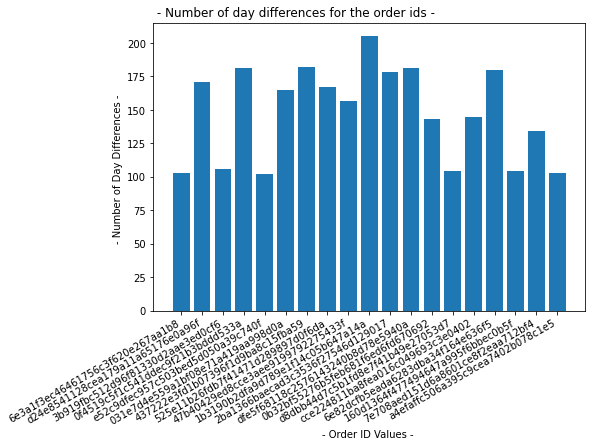

In [11]:
# Solve Question 7 below

#############################Q7 SOLUTION ######################################

#My solution for Q7 is as below:

fig = plt.figure() #for constructing an instance of figure
ax = fig.add_axes([0,0,1,1])
ax.bar(order_id_val,number_of_day_differences)
plt.xlabel("- Order ID Values - ") #for naming the x axis of the bar chart
plt.ylabel("- Number of Day Differences - ") #for naming the y axis of the bar chart
plt.title(" - Number of day differences for the order ids - ",loc='left') #for giving a title to the bar chart and locating this title at the left
plt.setp(ax.get_xticklabels(),rotation=30,horizontalalignment='right')
plt.show() #for displaying the bar chart

## Question 8 (15 pts)

In [ ]:
# Write an SQL query to find the total number of orders per week day, e.g., Monday -> 150 orders, Tuesday -> 200 orders,
# Wednesday -> 500 orders, etc. Use the "order_purchase_timestamp" attribute when counting the number of orders.
# Plot the result using a bar chart (days of week on x-axis, number of orders on y-axis). 

# HINT: Check out the "WEEKDAY" function of MySQL. 

[(0, 16196), (1, 15963), (2, 15552), (3, 14761), (4, 14122), (5, 10887), (6, 11960)]


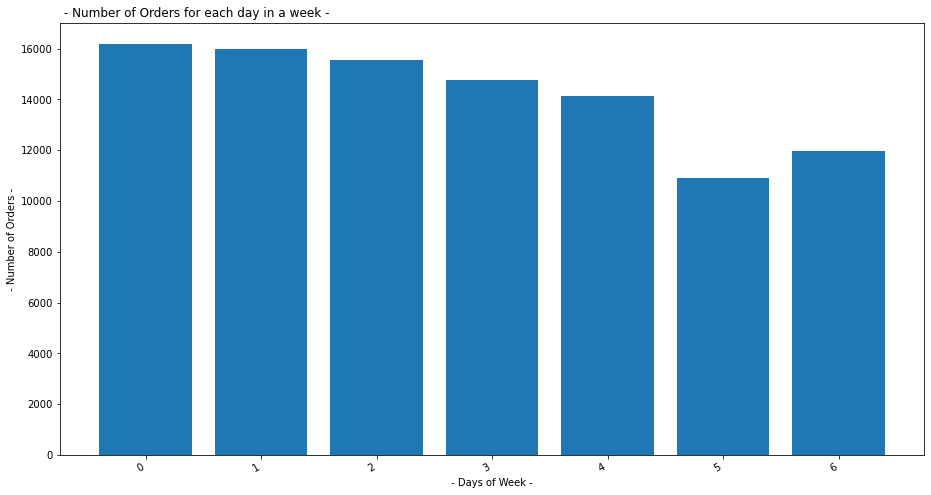

In [12]:
# Solve Question 8 below


#############################Q8 SOLUTION ######################################

eigth_query = """
              SELECT WEEKDAY(ORDERS.order_purchase_timestamp),COUNT(ORDERS.order_purchase_timestamp)
              FROM ORDERS
              GROUP BY WEEKDAY(ORDERS.order_purchase_timestamp)
              ORDER BY WEEKDAY(ORDERS.order_purchase_timestamp) ASC
              """

db_cursor.execute(eigth_query)

num_of_orders = db_cursor.fetchall()


print(num_of_orders)


weekdays,num_ord = map(list, zip (*num_of_orders))

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(weekdays,num_ord)

plt.xlabel(" - Days of Week - ") #Giving name to the x axis
plt.ylabel(" - Number of Orders - ") #Giving name to the y axis 
plt.title(" - Number of Orders for each day in a week - ",loc='left') #Giving title to the graph

plt.setp(ax.get_xticklabels(),rotation=30,horizontalalignment='right')
plt.show() #for displaying the graph



In [ ]:

db_cursor.close()
db_connection.close()